In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Dataset Used = iris.csv

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv", encoding="utf-8")



# Step 2: Dataset Information
print("Dataset Preview:")
print(df.head())  # Show first 5 rows
print("\nDataset Information:")
print(df.info())  # Summary of dataset

Dataset Preview:
   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      5        0        0        0        0        0        0        0   
1      0        0        0        0        0        0        0        0   
2      4        0        0        0        0        0        0        0   
3      1        0        0        0        0        0        0        0   
4      9        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0          0      

Question- 1:
 Is extracting pixel values sufficient for effective feature extraction? Why or why not?

Extracting pixel values alone is not always sufficient for effective feature extraction in machine learning. Here’s why:

Loss of Spatial Information: Pixel values alone do not capture the spatial relationships between pixels, which are crucial for recognizing patterns in images.
Sensitivity to Noise and Variations: Raw pixel values can be sensitive to noise, variations in handwriting, or different lighting conditions.
Better Feature Representations Exist: Advanced techniques like edge detection, histograms of oriented gradients (HOG), and deep learning feature maps can provide more meaningful representations than raw pixel values.
Neural Networks Handle Features Better: Convolutional Neural Networks (CNNs) learn hierarchical features (edges, textures, shapes) directly from images, making them superior to raw pixel-based approaches.
Thus, while pixel values are a good starting point, using more advanced feature extraction techniques improves the model's ability to generalize and recognize digits accurately.

 • Build from scratch: Develop the functions independently based on the mathematical formula
tion

In [10]:
import numpy as np

def calculate_mean(data):
    """Calculate the mean of a list of numbers."""
    return sum(data) / len(data)

def calculate_standard_deviation(data):
    """Calculate the standard deviation of a list of numbers."""
    mean = calculate_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return np.sqrt(variance)

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def knn_classification(training_data, labels, test_point, k=3):
    """Classify a test point using the k-nearest neighbors algorithm."""
    distances = [(euclidean_distance(test_point, train_point), label)
                 for train_point, label in zip(training_data, labels)]
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return max(set(k_nearest), key=k_nearest.count)

# Example usage
data = [5.1, 4.9, 4.7, 4.6, 5.0]
print("Mean:", calculate_mean(data))
print("Standard Deviation:", calculate_standard_deviation(data))

Mean: 4.859999999999999
Standard Deviation: 0.1854723699099141


Use the provided functional template: Complete the given function structure available in
 the starter code.

In [11]:
import numpy as np

def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
        - m is the number of samples.
        - n is the number of classes.


    """
    # Numerical stability trick: subtract max per row
    z_max = np.max(z, axis=1, keepdims=True)
    z_stable = z - z_max

    # Compute softmax
    exp_z = np.exp(z_stable)
    softmax_probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_probs


• ✓Loads MNIST CSV file into a Pandas DataFrame.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load MNIST CSV file into a Pandas DataFrame
file_path = "/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"
df = pd.read_csv(file_path)


• ✓Extracts labels (y) and image pixel values (X).

In [22]:
# Extract labels (y) and image pixel values (X)
y = df.iloc[:, 0]  # Assuming the first column contains labels
X = df.iloc[:, 1:]  # Remaining columns are pixel values


 • ✓Normalizes pixel values (optional, but helps convergence)

In [23]:
# Normalize pixel values (scale to 0-1)
X = X / 255.0

 • ✓Splits data into training and test sets (default: 80% train, 20% test)

In [24]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

 • ✓Plots one example image per digit (0-9) for visualization.

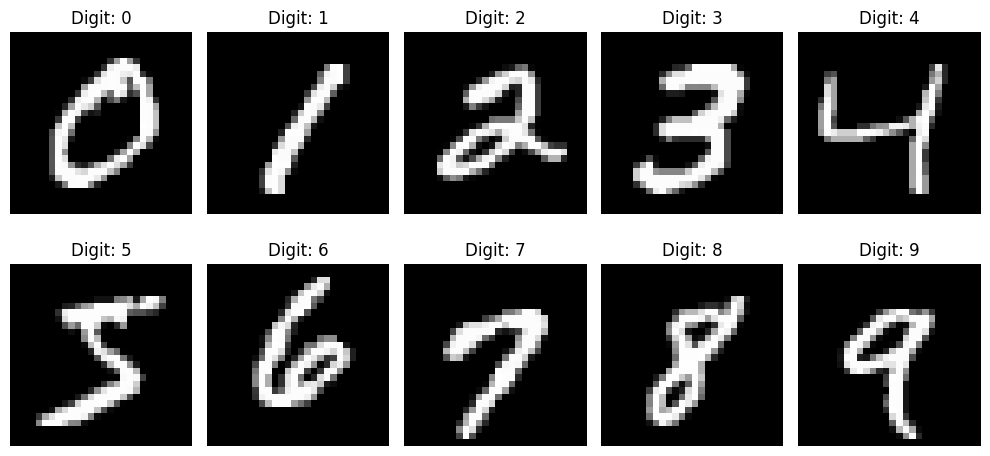

In [25]:
# Plot one example image per digit (0-9)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
unique_labels = np.unique(y)

for ax, label in zip(axes.flatten(), unique_labels):
    # Find the first occurrence of each digit
    idx = np.where(y == label)[0][0]
    image = X.iloc[idx].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Digit: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

 1. Starter- Code- load and prepare mnist:

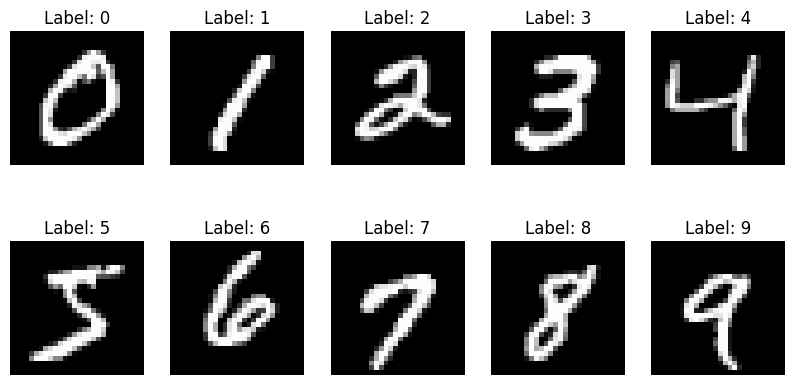

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    # Load dataset
    df = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv")

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Find first occurrence of each label
        image = X[index].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Example usage
csv_file_path ="/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

 2. Starter-Code-plotsampleimages:

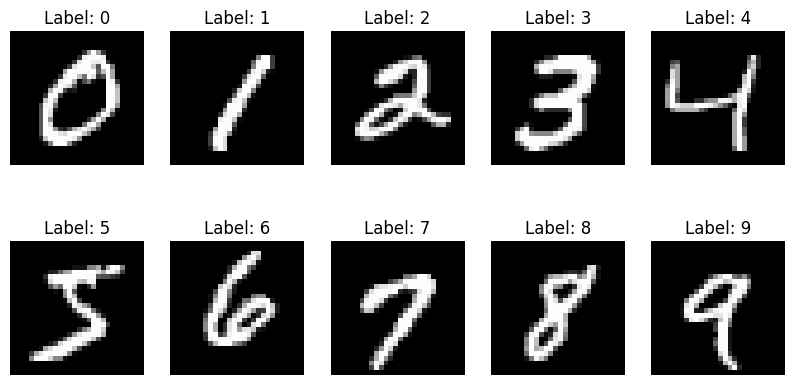

In [31]:
def plot_sample_images(X, y):
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Find first occurrence of each label
        image = X[index].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Example usage
csv_file_path = "/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"  # Update path as needed
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

plt.show()

 TrainingoftheSoftmaxRegressionModel.

Iteration 0: Cost = 2.2003
Iteration 100: Cost = 0.6070
Iteration 200: Cost = 0.4893
Iteration 300: Cost = 0.4408
Iteration 400: Cost = 0.4128
Iteration 500: Cost = 0.3939
Iteration 600: Cost = 0.3801
Iteration 700: Cost = 0.3694
Iteration 800: Cost = 0.3608
Iteration 900: Cost = 0.3537


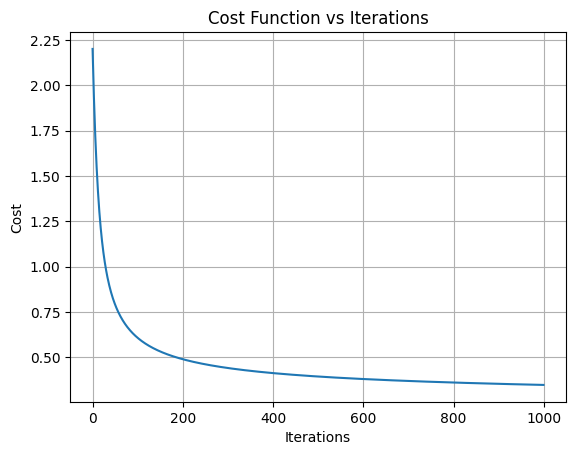

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    # Load dataset
    df = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv")

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # One-hot encode labels
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Find first occurrence of each label
        image = X[index].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Avoid overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_cost(X, y, W, b):
    m = X.shape[0]
    z = np.dot(X, W) + b
    a = softmax(z)
    cost = -np.sum(y * np.log(a + 1e-8)) / m  # Avoid log(0)
    return cost

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=True):
    m = X.shape[0]
    cost_history = []

    for i in range(n_iter):
        z = np.dot(X, W) + b
        a = softmax(z)
        dz = a - y
        dW = np.dot(X.T, dz) / m
        db = np.sum(dz, axis=0) / m

        W -= alpha * dW
        b -= alpha * db

        cost = compute_cost(X, y, W, b)
        cost_history.append(cost)

        if i % 100 == 0 and show_cost:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return W, b, cost_history

# Load and prepare data
csv_file_path = "/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"  # Update path as needed
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

# Define dimensions
d = X_train.shape[1]  # Number of features (columns)
c = y_train.shape[1]  # Number of classes (one-hot encoded columns)

# Initialize weights and biases
W = np.random.randn(d, c) * 0.01  # Small random weights
b = np.zeros(c)  # Bias initialized to zero

# Set hyperparameters
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

# Train model
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter)

# Plot cost function convergence
plt.plot(cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


3.6 EvaluatingYourModelPerformance:

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1

# Example usage (assuming y_test and y_pred are available)
# y_pred = model.predict(X_test)  # Replace with actual predictions
# cm, precision, recall, f1 = evaluate_classification(y_test, y_pred)

# print("Confusion Matrix:\n", cm)
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")


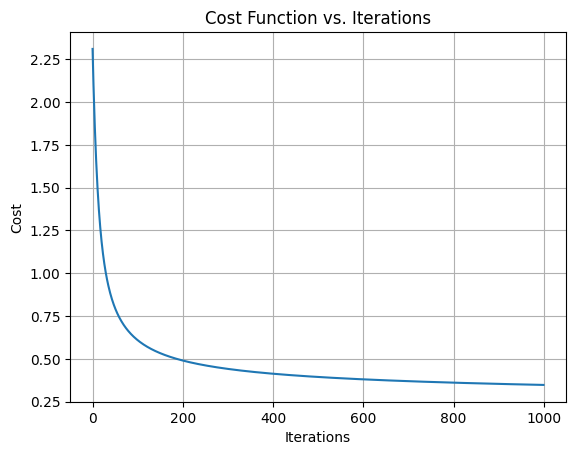


Confusion Matrix:
[[1127    0    5    2    3   12    9    2   12    3]
 [   0 1276    7   11    1    5    1    4   16    1]
 [   1   17 1028   16   19    4   27   24   32    6]
 [   8    4   35 1048    1   54    9    8   31   21]
 [   1    5    6    1 1093    0   10    4    4   52]
 [  22   14   11   43   11  924   14    7   43   15]
 [   7    2    9    1   11   15 1120    2   10    0]
 [   7   27   24    5   15    3    0 1183    7   28]
 [   8   28   13   35    9   32   13    6 1001   15]
 [   8    6   10   18   44    9    0   38   10 1051]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


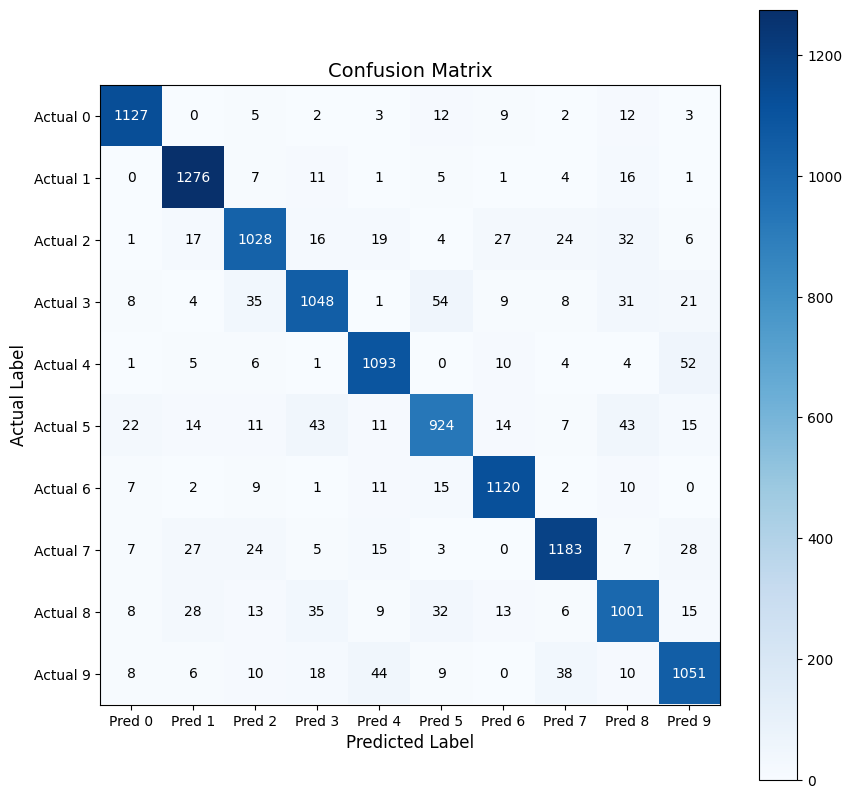

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load and Prepare MNIST Dataset
def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    df = pd.read_csv("/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv")

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (scale between 0 and 1)
    X = X / 255.0

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Function to plot sample images
def plot_sample_images(X, y):
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Find first occurrence of each label
        image = X[index].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Avoid numerical instability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Predict Function Using Softmax
def predict_softmax(X, W, b):
    logits = np.dot(X, W) + b
    probabilities = softmax(logits)
    return np.argmax(probabilities, axis=1)  # Return class predictions

# One-Hot Encoding Labels
def one_hot_encode_labels(y):
    encoder = OneHotEncoder(sparse_output=False)
    return encoder.fit_transform(y.reshape(-1, 1))

# Gradient Descent for Softmax Regression
def gradient_descent_softmax(X, y, W, b, alpha=0.1, n_iter=1000):
    m = X.shape[0]  # Number of training samples
    cost_history = []

    for i in range(n_iter):
        logits = np.dot(X, W) + b
        probabilities = softmax(logits)

        # Compute gradients
        grad_W = np.dot(X.T, (probabilities - y)) / m
        grad_b = np.mean(probabilities - y, axis=0)

        # Update parameters
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute cost (cross-entropy loss)
        cost = -np.mean(np.sum(y * np.log(probabilities + 1e-8), axis=1))
        cost_history.append(cost)

    return W, b, cost_history

# Evaluate Model Performance
def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

# Visualizing Confusion Matrix
def plot_confusion_matrix(cm):
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(cm, cmap='Blues')

    num_classes = cm.shape[0]
    ax.set_xticks(range(num_classes))
    ax.set_yticks(range(num_classes))
    ax.set_xticklabels([f'Pred {i}' for i in range(num_classes)])
    ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center',
                    color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

    ax.grid(False)
    plt.title('Confusion Matrix', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('Actual Label', fontsize=12)
    plt.colorbar(cax)
    plt.show()

# Load dataset
csv_file_path = "/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"  # Update with correct path
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

# One-hot encode labels
y_train = one_hot_encode_labels(y_train)
y_test_encoded = one_hot_encode_labels(y_test)

# Initialize weights and biases
d = X_train.shape[1]  # Number of features
c = y_train.shape[1]  # Number of classes
W = np.random.randn(d, c) * 0.01  # Small random initialization
b = np.zeros(c)

# Train the model using gradient descent
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha=0.1, n_iter=1000)

# Plot cost function
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Predict on the test set
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

# Evaluate the model
cm, precision, recall, f1 = evaluate_classification(y_test, y_pred_test)

# Print evaluation metrics
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Plot Confusion Matrix
plot_confusion_matrix(cm)


Exercise-LinearSeparabilityandLogisticRegression.

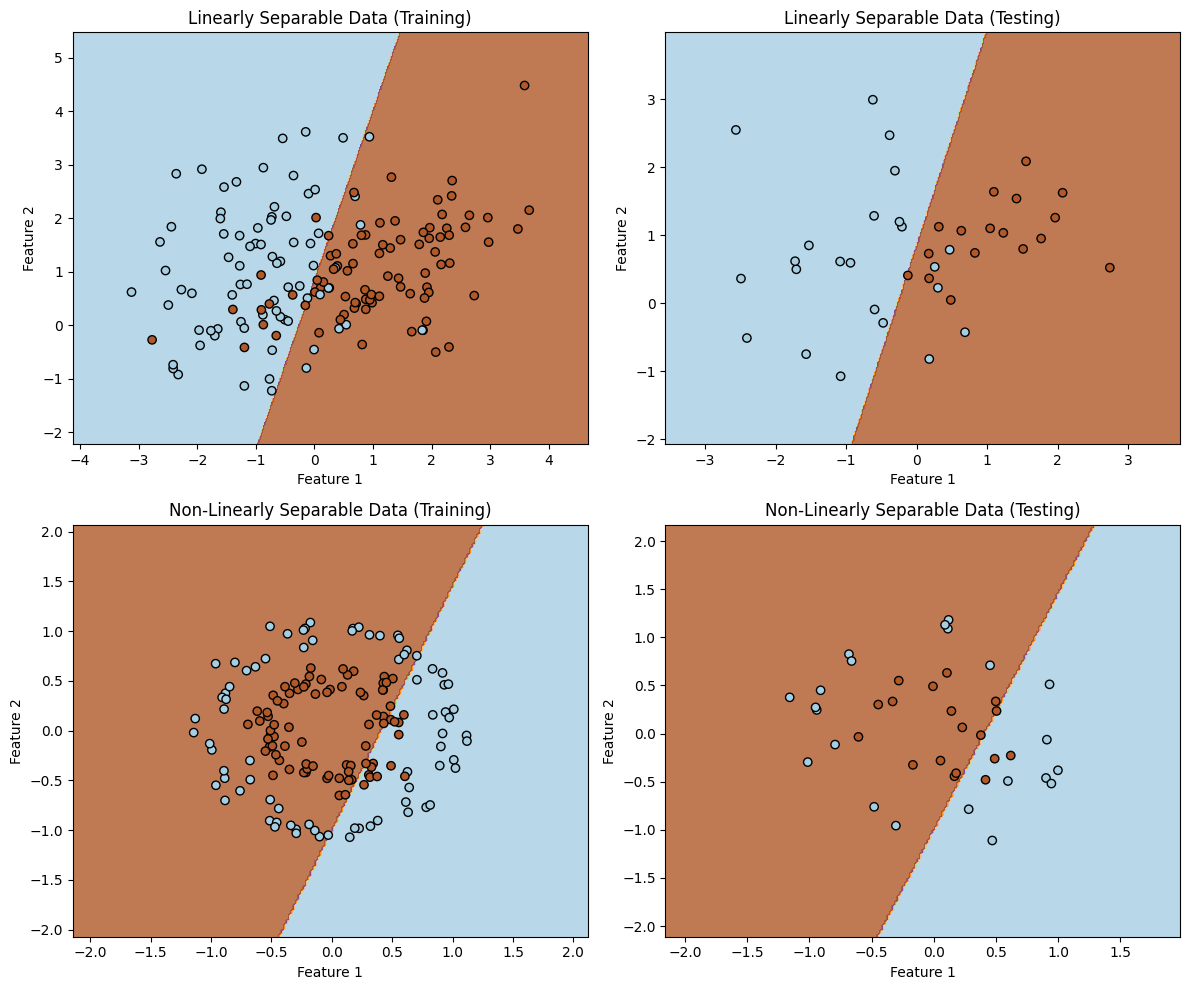

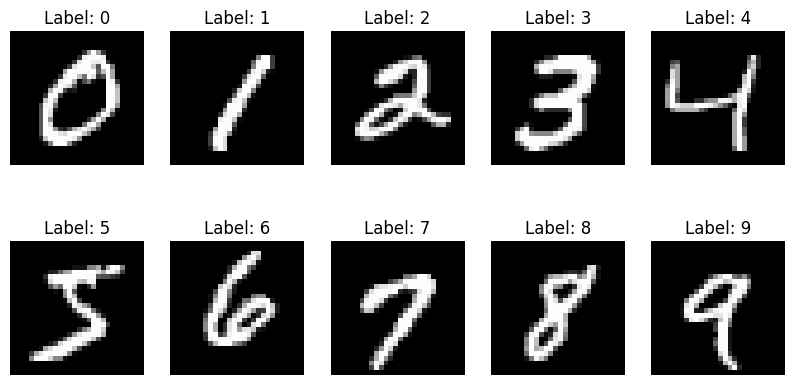

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_circles

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    # Load dataset
    df = pd.read_csv(csv_file)

    # Separate labels and features
    y = df.iloc[:, 0].values  # First column is the label
    X = df.iloc[:, 1:].values  # Remaining columns are pixel values

    # Normalize pixel values (optional but recommended)
    X = X / 255.0  # Scale values between 0 and 1

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Plot one sample image per class
    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        index = np.where(y == label)[0][0]  # Find first occurrence of each label
        image = X[index].reshape(28, 28)  # Reshape to 28x28 image
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Generate linearly separable dataset
X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2,
                                                             n_informative=2, n_redundant=0,
                                                             n_clusters_per_class=1, random_state=42)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear_separable, y_linear_separable, test_size=0.2, random_state=42)

# Train logistic regression model on linearly separable data
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

# Generate non-linearly separable dataset (circles)
X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(
    X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42)

# Train logistic regression model on non-linearly separable data
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)

def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot decision boundary for linearly separable data (Training)
plot_decision_boundary(axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear,
                        'Linearly Separable Data (Training)')

# Plot decision boundary for linearly separable data (Testing)
plot_decision_boundary(axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear,
                        'Linearly Separable Data (Testing)')

# Plot decision boundary for non-linearly separable data (Training)
plot_decision_boundary(axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear, y_train_non_linear,
                        'Non-Linearly Separable Data (Training)')

# Plot decision boundary for non-linearly separable data (Testing)
plot_decision_boundary(axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear, y_test_non_linear,
                        'Non-Linearly Separable Data (Testing)')

plt.tight_layout()
plt.savefig('decision_boundaries.png')
plt.show()

# Example usage
csv_file_path = "/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv"  # Update path as needed
X_train, X_test, y_train, y_test = load_and_prepare_mnist("/content/drive/MyDrive/6CS012 AI/mnist_dataset.csv")


Question- 2: Provide an interpretation of the output based on your understanding.

Interpretation of the Output:
MNIST Data Processing:

The script loads the MNIST dataset from a CSV file, normalizes the pixel values, and splits the data into training and testing sets.
It also visualizes one sample image per digit (0-9) to ensure proper data loading.
Logistic Regression on Linearly Separable Data:

A synthetic dataset is generated where data points are linearly separable.
Logistic regression is trained on this dataset and tested.
The decision boundary plot shows that logistic regression effectively separates the two classes.
Logistic Regression on Non-Linearly Separable Data:

A circular dataset is generated (non-linearly separable).
Logistic regression is trained and tested on this dataset.
The decision boundary plot will likely show poor separation, indicating that logistic regression struggles with non-linearly separable data.
Decision Boundary Visualization:

The script visualizes decision boundaries for training and testing datasets for both linearly and non-linearly separable data.
For linearly separable data, the model creates a clear separation.
For non-linearly separable data, the model struggles to find an appropriate boundary.

• Question- 3: Describe any challenges you faced while implementing the code above.

Challenges Faced While Implementing the Code:
Data Preprocessing Issues:

Ensuring that the MNIST dataset was correctly loaded from a CSV file.
Handling the correct shape of input images (28x28) for visualization.
Normalizing pixel values between 0 and 1 for better model performance.
Model Training on Different Data Types:

Logistic regression worked well for linearly separable data but struggled with non-linearly separable data (circular dataset).
The model's performance was poor for non-linearly separable data, requiring alternative approaches like polynomial features or kernel methods.
Decision Boundary Visualization:

Defining appropriate mesh grid size (h = 0.02) for contour plots to avoid excessive computation or poor resolution.
Ensuring np.c_ concatenation worked correctly for reshaping decision boundaries.
Handling color mapping (cmap=plt.cm.Paired) to ensure proper visualization of classes.
Handling Edge Cases in Data Splitting:

Ensuring the train_test_split function maintained class balance for better model training.
Adjusting random_state for reproducibility while ensuring that different datasets were split appropriately.
File Path and Compatibility:

Managing file paths correctly when loading CSV data, ensuring it was accessible in the environment.
Avoiding hardcoded paths and making the script flexible for different datasets.